## Ejercicio: Identificación de tipos de problemas en el aprendizaje automático
Antes de aplicar algoritmos de aprendizaje automático, primero debemos entender si estamos tratando con un problema de regresión o de clasificación (y, en el caso de la clasificación, si es binario o multiclase). Estudia los conjuntos de datos Titanic, Iris, Wine y Diabetes de los conjuntos de datos de ejemplo de scikit-learn y clasifica cada uno de ellos según su tipo de problema (lee las descripciones de estos conjuntos de datos [aquí](https://scikit-learn.org/1.5/datasets/toy_dataset.html). Luego, explica por qué es importante esta identificación.

# Ejercicios de visualización

## Ejercicio: visualización de árboles de decisión
Estudieael siguiente código para representar un árbol de decisión.

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.3846153846

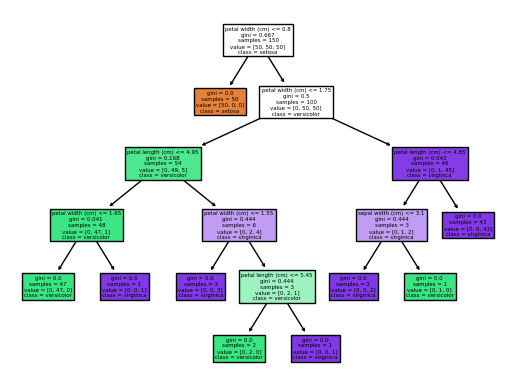

In [23]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
# ignore the text output
tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,#
               filled = True)

## Ejercicio: fronteras de decisión en clasificadores
Estudia el siguiente fragmento de código y utilízalo para dibujar las **fronteras de decisión (decision boundaries)** de **TODOS** los clasificadores estudiados en clase.

Basándote en estas visualizaciones, identifica qué clasificadores:
* Solo pueden producir fronteras de decisión lineales
* Son capaces de crear fronteras de decisión no lineales

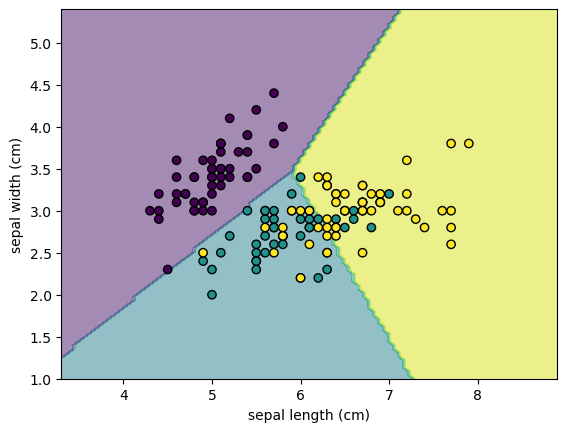

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Just use a two dimensions for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

## Ejercicio: visualización de la regresión
Al predecir *y* utilizando una única característica *x*, es posible visualizar el rendimiento de un regresor dibujando los datos (x,y) y luego las predicciones (x, y_pred). Sin embargo, ¿qué hacer si tenemos múltiples características? Un buen truco es trazar (y, y_pred) y compararlo con un predictor perfecto. 

Estudia el siguiente código que implementa esta idea. (Ten en cuenta que esta idea solo funciona para regresores; en la clasificación, generalmente tenemos que usar matrices de confusión o gráficos ROC).

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


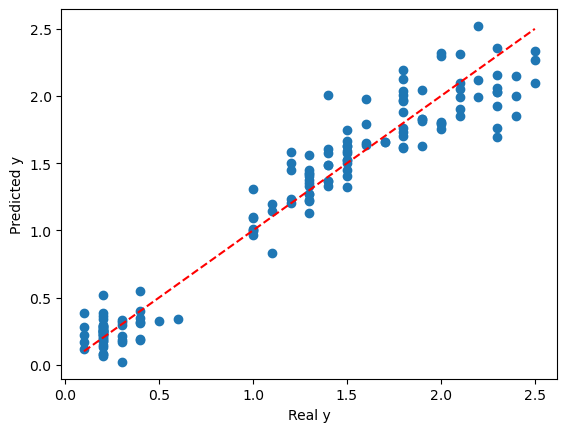

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

iris = load_iris()
print(iris.feature_names)

# Let's try to predict petal width using the other features
X = iris.data[:, :3]
y = iris.data[:, -1:]

model = LinearRegression().fit(X, y)

# This should be usually done on the test set
y_preds = model.predict(X)
plt.scatter(y, y_preds)
plt.xlabel('Real y')
plt.ylabel('Predicted y')
# ideal result is a straight line with slope 1, why?
horizontal_axis = np.linspace(min(y), max(y), 100) 
ideal_preds = horizontal_axis
plt.plot(horizontal_axis, ideal_preds, '--r')

# Ejercicios de regresión y clasificación

Ejercicio: Práctica con Clasificadores y Regresores
Usa **TODOS** los modelos presentados en la teoría con los siguientes conjuntos de datos (ver siguiente bloque de código).
* Titanic, conjunto de datos de clasificación binaria.
* Wine, conjunto de datos de clasificación multiclase.
* Diabetes, conjunto de datos de regresión.
  
El objetivo del ejercicio no es lograr una gran precisión o un bajo error cuadrático medio, sino entender cómo los parámetros teóricos se mapean a la API de Sklearn. Por lo tanto, simplemente realiza una división de entrenamiento/prueba y experimenta con los clasificadores y regresores.


In [11]:
from sklearn import datasets
import pandas as pd

titanic = pd.read_csv('data/titanic.csv')
titanic_X, titanic_y = titanic.drop('Survived', axis=1), titanic['Survived']
wine_X, wine_y = datasets.load_wine(return_X_y=True)
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# ...

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Ejercicio: Importancia de Características
Los modelos de aprendizaje automático como la Regresión Lineal (a través de la magnitud de los coeficientes), los Random Forests (a través de la disminución de la impureza) y XGBoost (usando métricas de ganancia/división) proporcionan métodos para medir la importancia de las características, una herramienta valiosa que nos ayuda a comprender qué variables de entrada tienen la influencia más fuerte en las predicciones. Al analizar la importancia de las características, puedes interpretar las decisiones del modelo, identificar los predictores clave y, potencialmente, simplificar tus modelos al enfocarte en las características más relevantes.

Estudia el siguiente [ejemplo](https://scikit-learn.org/1.5/auto_examples/ensemble/plot_forest_importances.html) sobre la importancia de las características en los Random Forests.

## Ejercicio: Comparación de modelos
Selecciona un problema de los anteriores y escribe el código para:

* Entrenar un par de modelos.
* Seleccionar el mejor utilizando un conjunto de validación.
* Informar sobre el rendimiento del mejor modelo en el conjunto de prueba.

# Ejercicio: Conjuntos de datos del mundo real
Los conjuntos de datos anteriores son conjuntos de datos de juguete. Usa los modelos más poderosos (Random Forests y, especialmente, XGBoost) en el conjunto de datos de Vivienda de California -> [California Housing dataset](https://scikit-learn.org/1.5/datasets/real_world.html).